In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot as gplt

import pandas as pd

stree_codes = pd.read_csv('../data/meta_data/street_code_mapper.csv').T
stree_codes.columns = stree_codes.iloc[0]
stree_codes.drop('Unnamed: 0', inplace=True)

gdf = gpd.GeoDataFrame(
    stree_codes, geometry=gpd.points_from_xy(stree_codes.long, stree_codes.lat), crs="EPSG:4326"
)

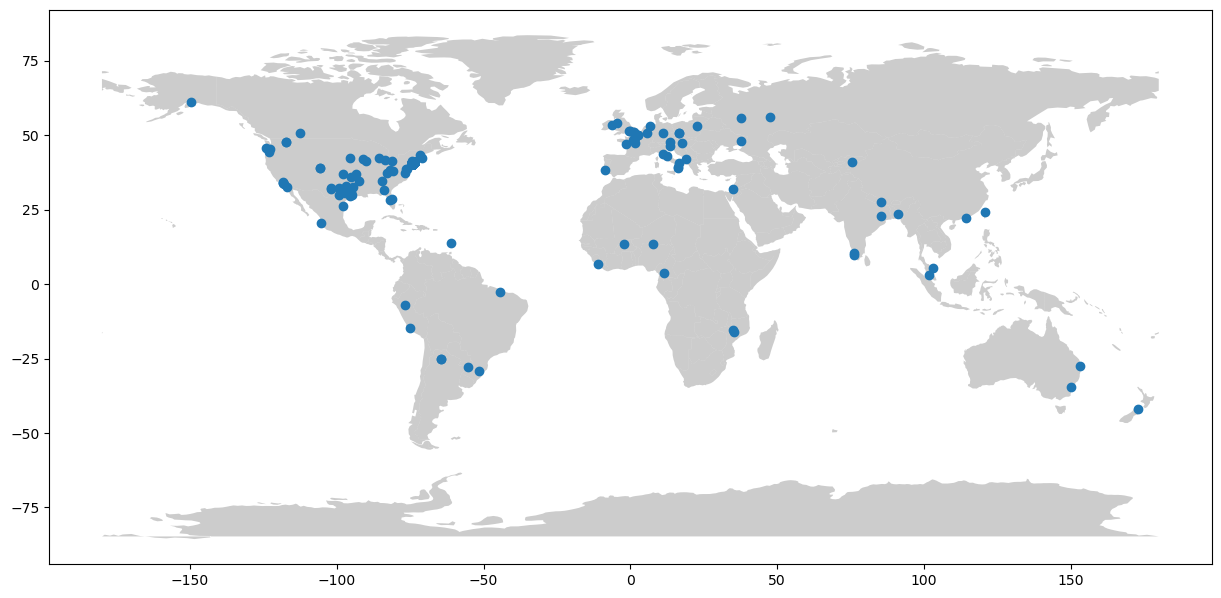

In [6]:
world = gpd.read_file(gplt.datasets.get_path('world'))

geo_df=gpd.GeoDataFrame(gdf,crs="EPSG:4326",geometry=gpd.points_from_xy(gdf["long"], gdf["lat"]))

fig,ax=plt.subplots(figsize=(15,15))
world.plot(ax=ax,alpha=0.4,color="grey")
geo_df.plot(ax=ax)
plt.show()

In [12]:
len(stree_codes)

12416

In [7]:
xmin, ymin, xmax, ymax = -79.7633786294863,40.502009391283906,-71.85616396303963,45.01550900568005

In [8]:
subset = gdf.cx[xmin:xmax, ymin:ymax]

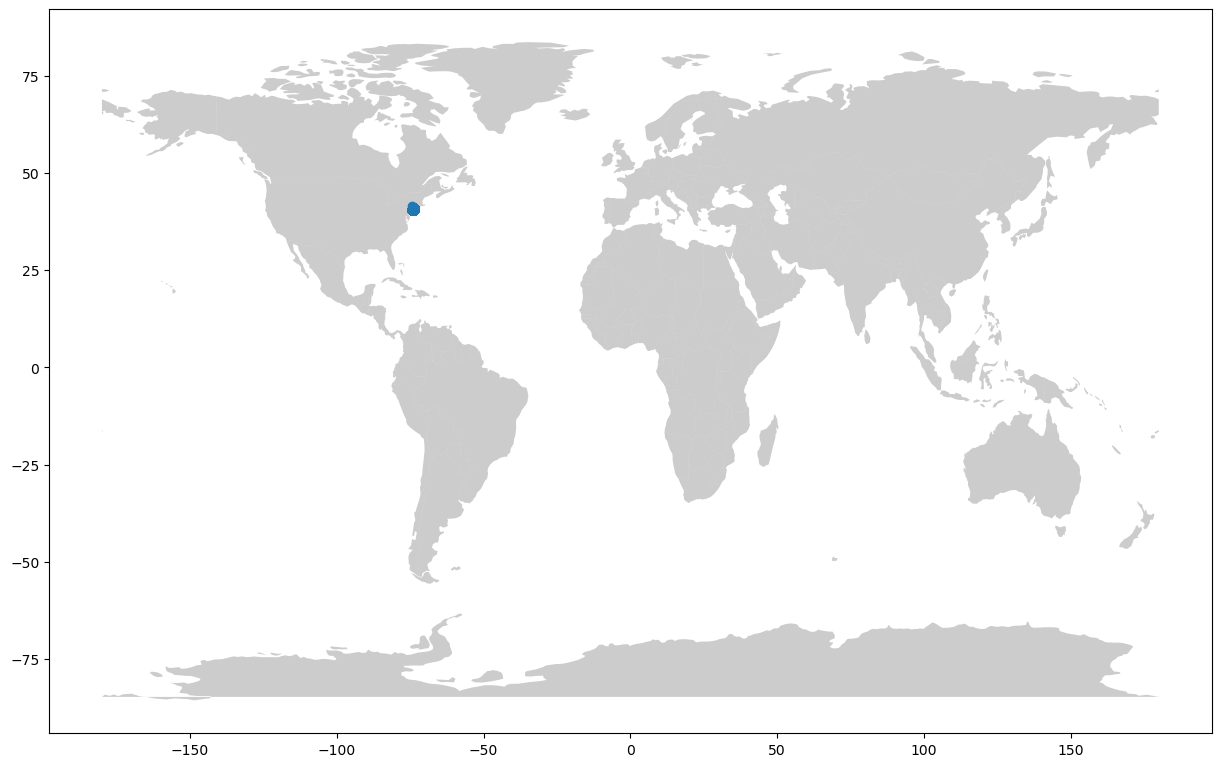

In [9]:
world = gpd.read_file(gplt.datasets.get_path('world'))

geo_df=gpd.GeoDataFrame(subset,crs="EPSG:4326",geometry=gpd.points_from_xy(subset["long"], subset["lat"]))

fig,ax=plt.subplots(figsize=(15,15))
world.plot(ax=ax,alpha=0.4,color="grey")
geo_df.plot(ax=ax)
plt.show()

In [11]:
len(subset)

12296

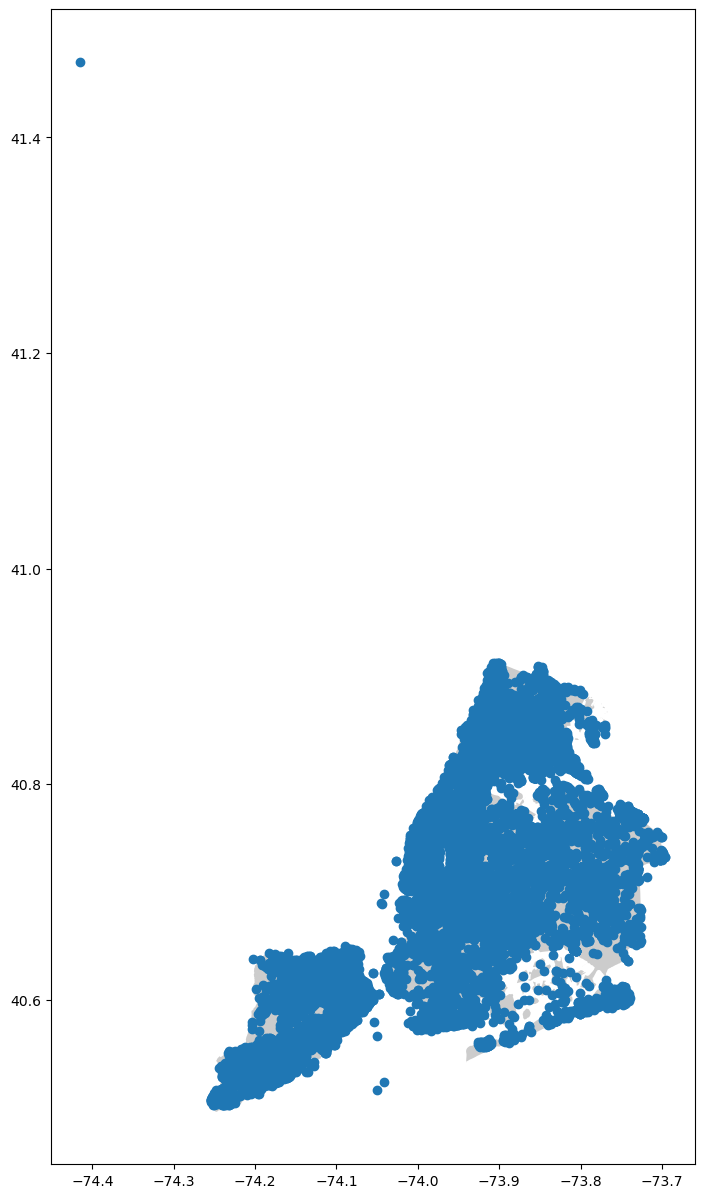

In [10]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))

geo_df=gpd.GeoDataFrame(subset,crs="EPSG:4326",geometry=gpd.points_from_xy(subset["long"], subset["lat"]))

fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
geo_df.plot(ax=ax)
plt.show()

In [15]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=64)
res = clf.fit_predict(subset[['long', 'lat']])
(res == -1).sum()

353

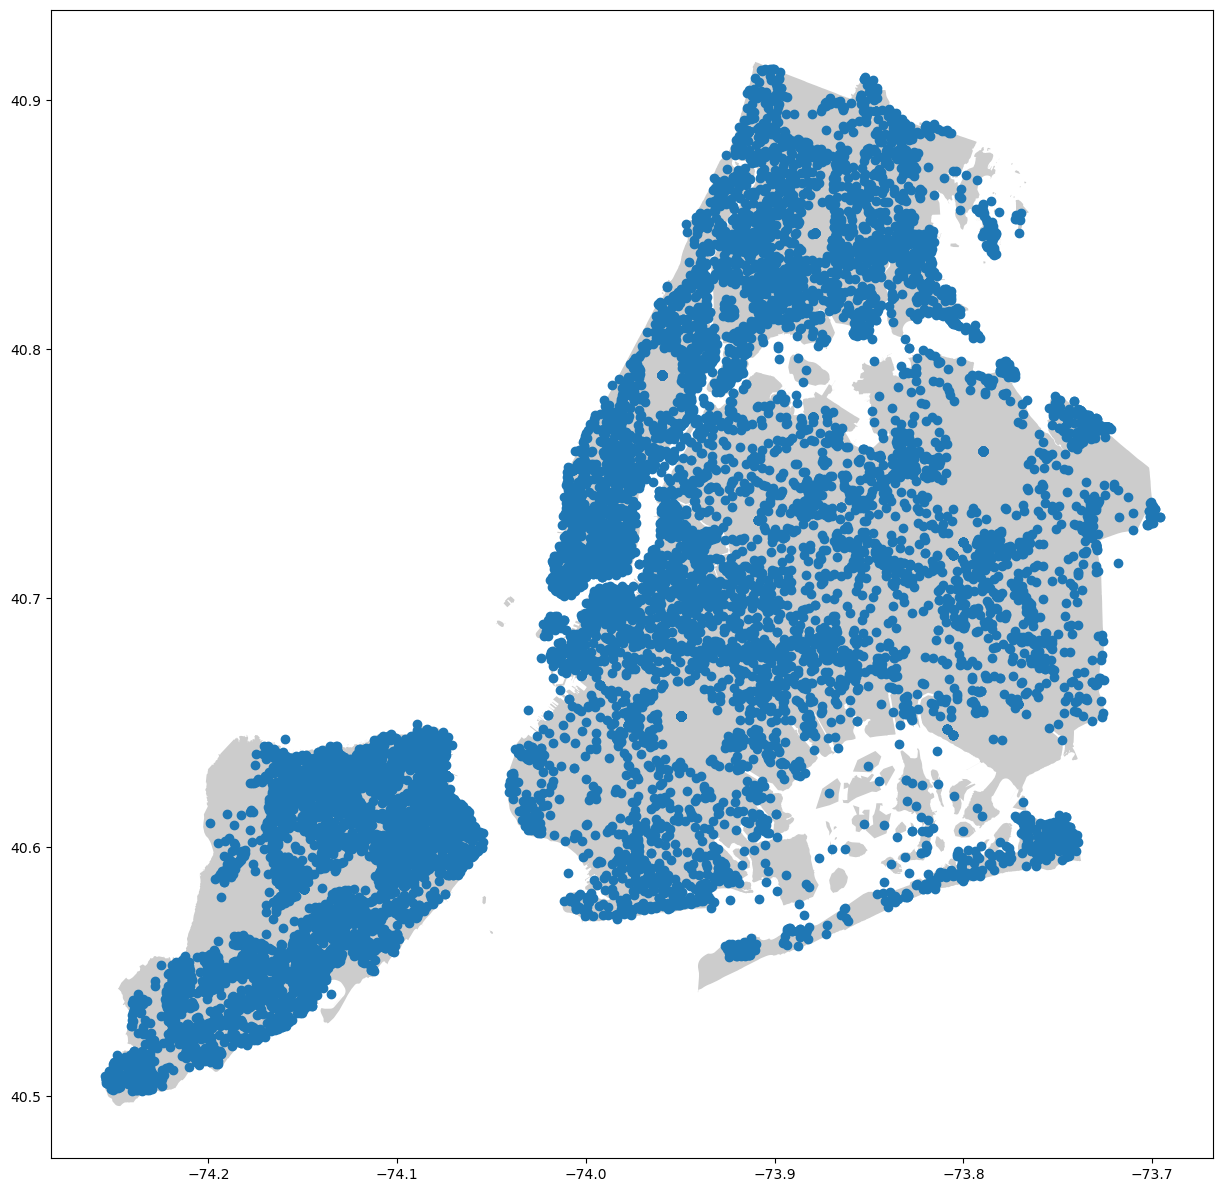

In [16]:
tmp = subset[res == 1]

boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))

geo_df=gpd.GeoDataFrame(tmp,crs="EPSG:4326",geometry=gpd.points_from_xy(tmp["long"], tmp["lat"]))

fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
geo_df.plot(ax=ax)
plt.show()

In [17]:
subset = tmp
len(subset)

11943

In [18]:
subset.to_csv('../data/meta_data/street_code_mapper_C.csv')